In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = 15,10
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
data = pd.read_csv('feature_x_train.csv')
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Net_DSL', 'Net_Fiber optic',
       'Net_No', 'Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check', 'Month-to-month', 'One year',
       'Two year', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'ten1-18', 'ten19-36', 'ten37-54', 'ten55-72'],
      dtype='object')

In [4]:
x_train = data.drop('Churn', axis= 1)
y_train = data.Churn

### Checking for the constant values with variance zero

In [5]:
var_thres = VarianceThreshold()

In [6]:
var_thres.fit(x_train)

VarianceThreshold(threshold=0.0)

In [7]:
x_train.columns[var_thres.get_support()]
var_thres_columns = x_train.columns[var_thres.get_support()]

In [8]:
x_train.shape

(6033, 37)

##### These are the features without zero variance so we can use these features for modeling

### Pearson Correlation

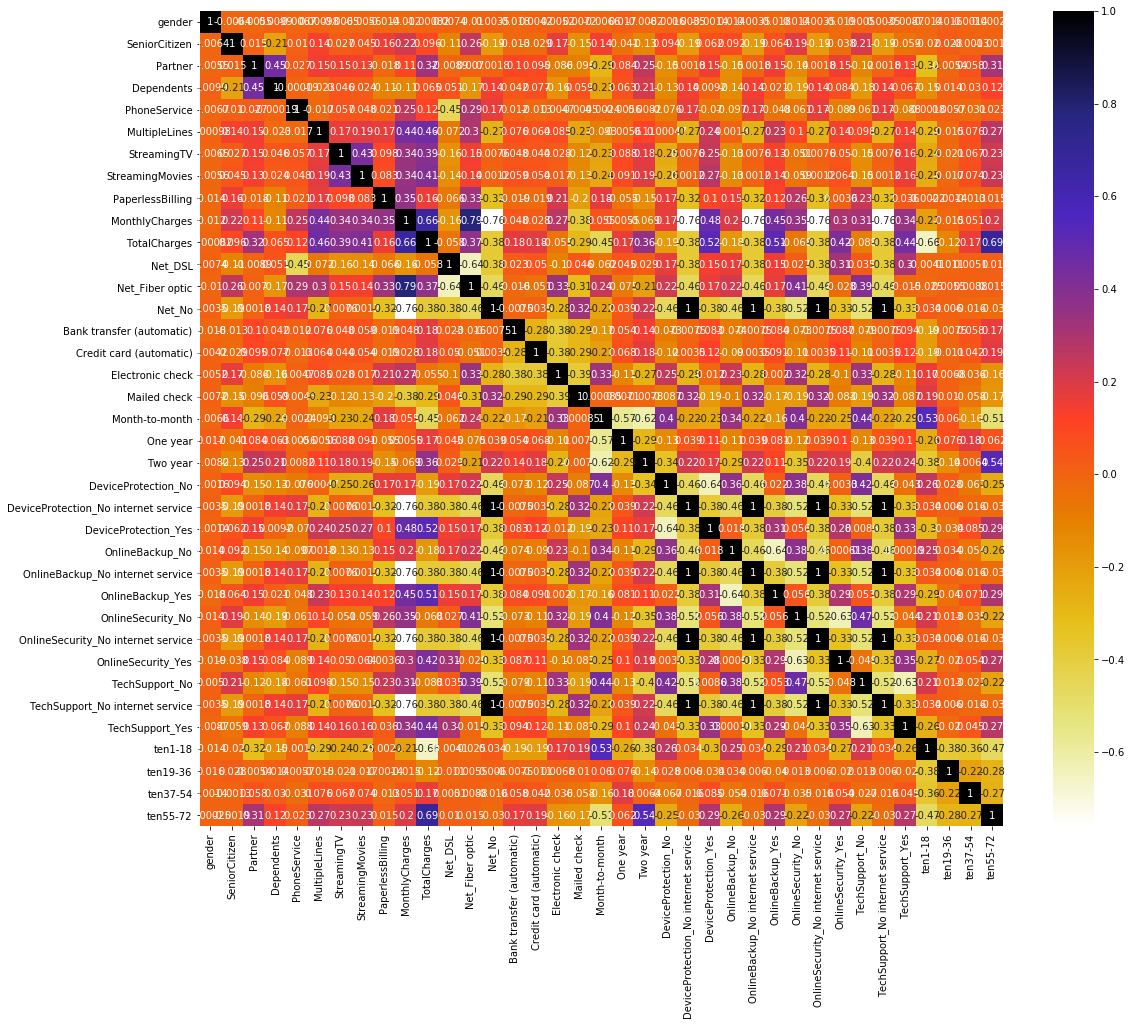

In [9]:
plt.figure(figsize= (18,15))
cor_mat = x_train.corr()
sns.heatmap(cor_mat, annot= True, cmap= plt.cm.CMRmap_r)

In [10]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [11]:
cor_drop = correlation(x_train, 0.6)
cor_drop

{'DeviceProtection_No internet service',
 'Net_Fiber optic',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'TechSupport_No internet service',
 'TotalCharges',
 'ten55-72'}

##### No feature is hightly correlated to each other so we dont need to remove any feature

### Information Gain

In [12]:
mutual_info = mutual_info_classif(x_train, y_train)

In [13]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

Month-to-month                          0.089055
TechSupport_No                          0.059135
Two year                                0.055973
OnlineSecurity_No                       0.054868
ten1-18                                 0.053900
Net_Fiber optic                         0.047061
MonthlyCharges                          0.045044
TotalCharges                            0.044973
Electronic check                        0.038565
StreamingMovies                         0.037991
ten55-72                                0.034977
OnlineSecurity_No internet service      0.034623
DeviceProtection_No                     0.034201
TechSupport_No internet service         0.034172
OnlineBackup_No                         0.033158
StreamingTV                             0.030355
DeviceProtection_No internet service    0.027931
OnlineBackup_No internet service        0.027577
Net_No                                  0.026067
PaperlessBilling                        0.024337
Dependents          

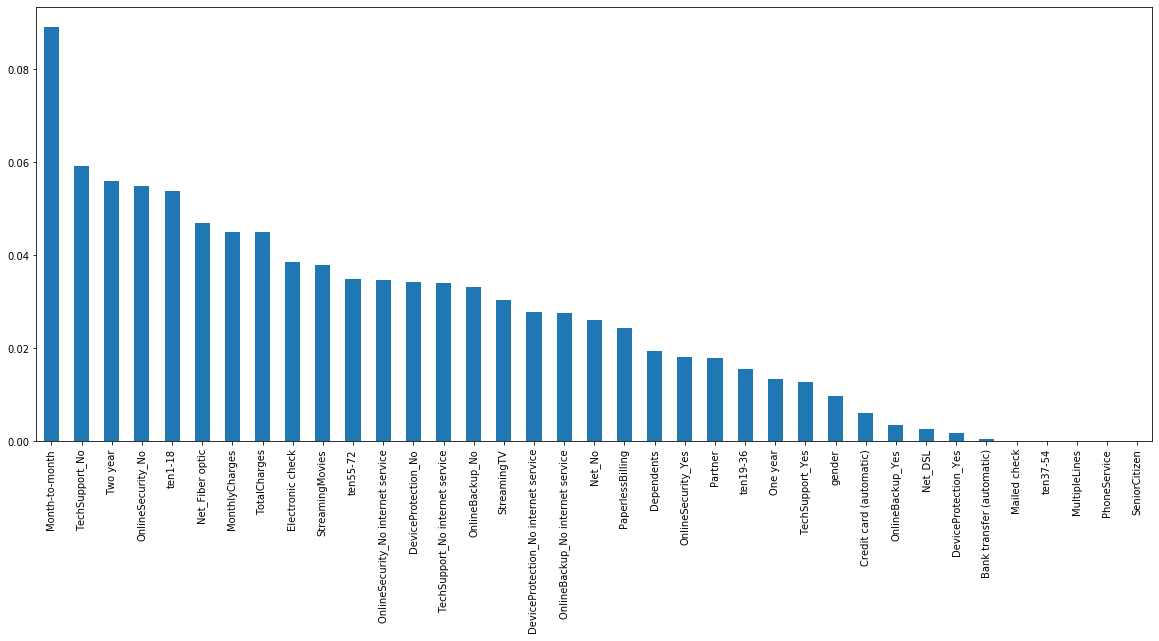

In [14]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.show()

In [15]:
select_ig = SelectKBest(mutual_info_classif, k=15)
select_ig.fit(x_train, y_train)
ig_columns= x_train.columns[select_ig.get_support()]

##### These are the top 10 features from the information gain

In [16]:
cat_x =x_train.drop(labels=['MonthlyCharges', 'TotalCharges'], axis= 1)

In [17]:
f_p_values=chi2(cat_x,y_train)

In [18]:
p_values=pd.Series(f_p_values[1])
p_values.index=cat_x.columns
p_values

gender                                  5.396373e-01
SeniorCitizen                           1.982586e-26
Partner                                 3.933021e-16
Dependents                              3.147761e-25
PhoneService                            8.508133e-01
MultipleLines                           6.662897e-03
StreamingTV                             1.345286e-02
StreamingMovies                         1.042365e-02
PaperlessBilling                        2.934601e-21
Net_DSL                                 5.410511e-14
Net_Fiber optic                         6.496960e-68
Net_No                                  1.039888e-53
Bank transfer (automatic)               9.668418e-15
Credit card (automatic)                 8.815031e-21
Electronic check                        3.877653e-79
Mailed check                            6.163386e-10
Month-to-month                          7.682208e-99
One year                                2.221355e-34
Two year                                1.4044

In [19]:
p_values.sort_index(ascending=False)

ten55-72                                6.126655e-62
ten37-54                                1.850833e-08
ten19-36                                4.512691e-03
ten1-18                                 2.660567e-83
gender                                  5.396373e-01
Two year                                1.404452e-92
TechSupport_Yes                         6.169434e-26
TechSupport_No internet service         1.039888e-53
TechSupport_No                          5.028657e-74
StreamingTV                             1.345286e-02
StreamingMovies                         1.042365e-02
SeniorCitizen                           1.982586e-26
PhoneService                            8.508133e-01
Partner                                 3.933021e-16
PaperlessBilling                        2.934601e-21
OnlineSecurity_Yes                      2.480937e-30
OnlineSecurity_No internet service      1.039888e-53
OnlineSecurity_No                       1.646164e-78
OnlineBackup_Yes                        2.5854

In [20]:
select_chi = SelectKBest(chi2, k= 15)
select_chi.fit(cat_x, y_train)
chi2_columns = cat_x.columns[select_chi.get_support()]

### Feature Importance

In [21]:
model=ExtraTreesClassifier()
model.fit(x_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [22]:
print(model.feature_importances_)

[0.0398111  0.02742915 0.0352032  0.02757657 0.00770921 0.02918043
 0.02386064 0.02415332 0.03179252 0.1434115  0.16445877 0.01273855
 0.02479447 0.00363261 0.01454161 0.01457238 0.03034651 0.01235861
 0.05718576 0.01331353 0.02088905 0.01722878 0.00249809 0.01549978
 0.01852022 0.00226671 0.01436433 0.03592891 0.00251205 0.01040554
 0.02915442 0.00503023 0.01107353 0.03749341 0.01214527 0.01087222
 0.01604702]


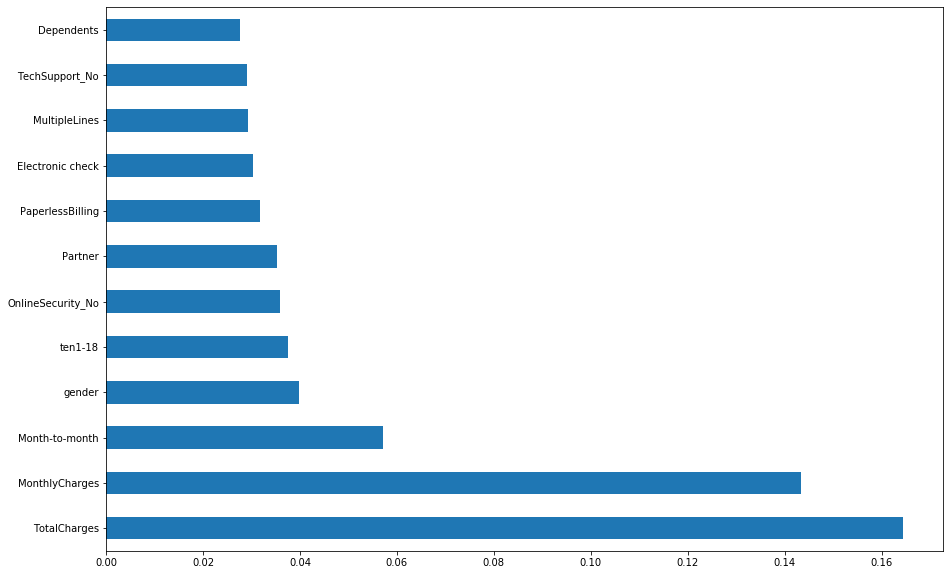

In [23]:
ranked_features=pd.Series(model.feature_importances_,index=x_train.columns)
ranked_features.nlargest(12).plot(kind='barh')
plt.show()